# Decision Tree - Viners kvalitet  
*Inlämningsuppgift 1 - Maskininlärning och Deep Learning*  
*Deadline: 27:e April 2025*

---

## 1.1 Godkänt

### Analysera datan
- Hur många datapunkter och attribut finns?
- Hur många klasser av kvalitet finns det?
- Hur ser distributionen ut för de olika attributen?
- Finns det något attribut som inte borde användas?

### Dela upp datan i tränings- och testset

### Träna ett Decision Tree
- Vad får modellen för testscore?
- Hur djupt är trädet?
- Hur många löv har trädet?
- Vilka attribut har störst påverkan?

---

## 1.2 Väl Godkänt

### Jämför träningsscore och testscore
- Hur skiljer de sig och varför?
- Finns det något att göra åt fenomenet?

### Rita ut trädet
- Hur många grenar kommer det maximalt från en nod?
- Varför är det max så många grenar från en nod?

---




## Analysera datan:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("WineQT.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


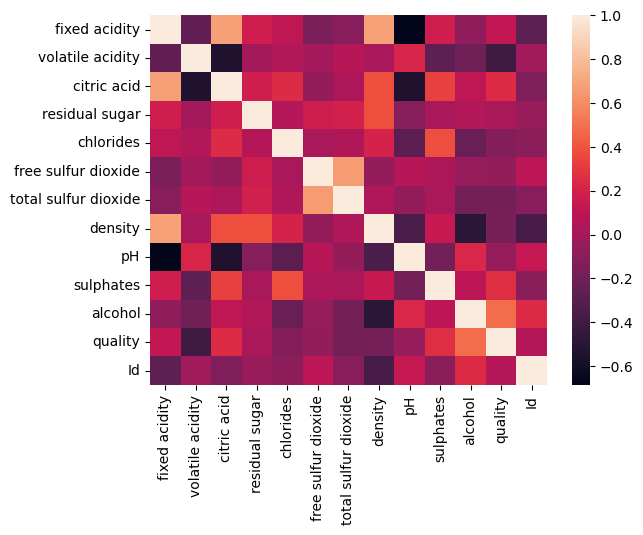

In [13]:
sns.heatmap(df.corr())
plt.show()

## Hur många datapunkter och attribut finns?

In [7]:
# 1143 datapunkter och 13 attribut
df.shape

(1143, 13)

## Hur många klasser av kvalitet finns det?

In [8]:
# Mängd klasser av kvalitet
quality_dist = df["quality"].value_counts()
quality_dist

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Text(0.5, 0, 'Kvalitet')

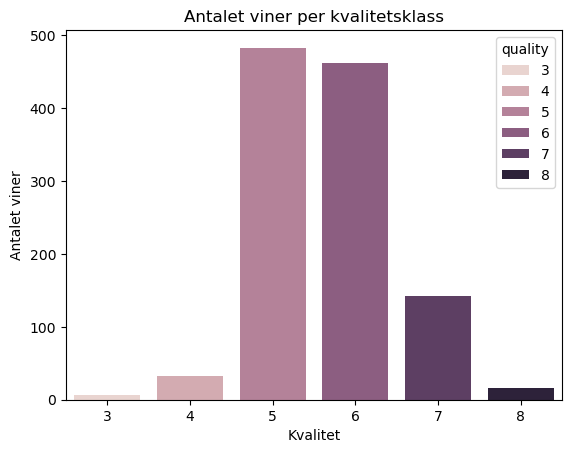

In [9]:
sns.countplot(x=df["quality"], hue=df["quality"])
plt.title("Antalet viner per kvalitetsklass")
plt.ylabel("Antalet viner")
plt.xlabel("Kvalitet")

# Hur ser distributionen ut för de olika attributen?: 

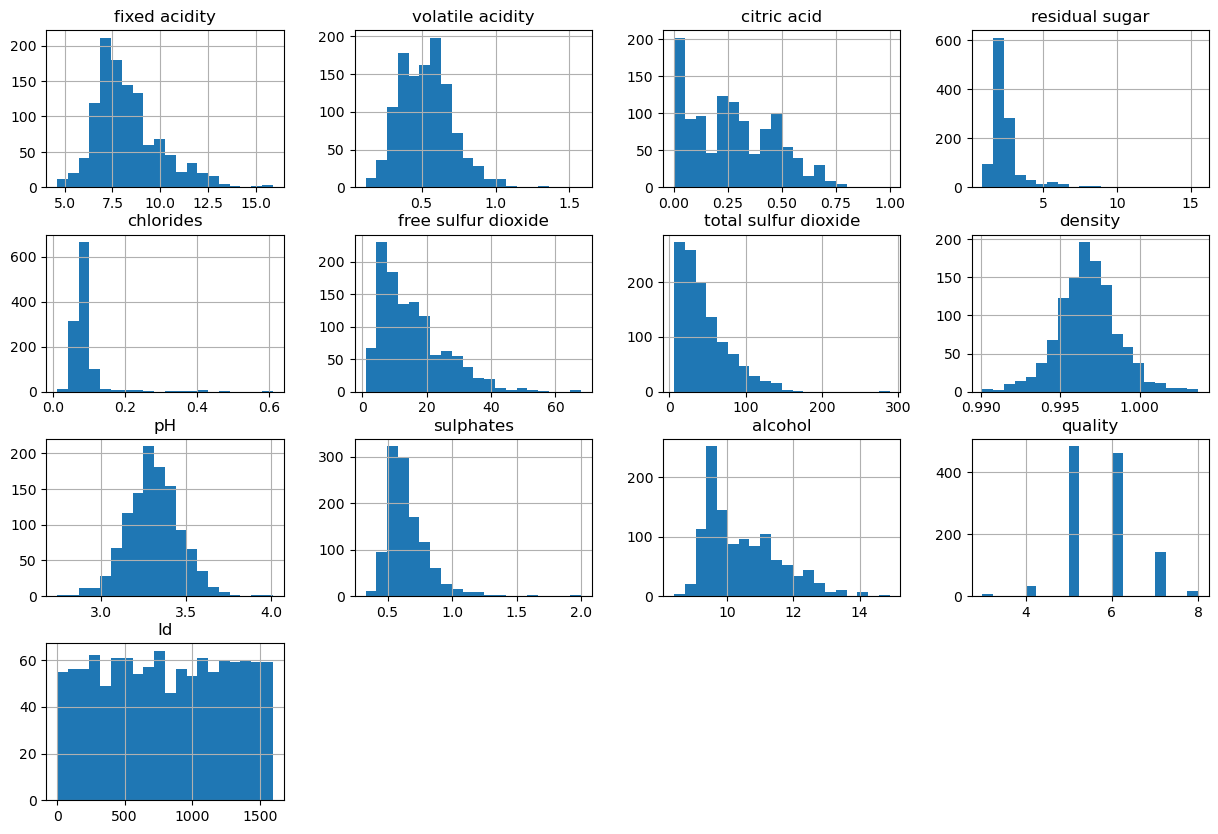

In [11]:
df.hist(bins=20, figsize=(15,10))
plt.show()

## Finns det något attribut som inte borde användas? 
Ja, attributet **Id** bör tas bort innan modellträning.  
Id är endast en identifierare och innehåller ingen relevant information för att förutsäga vinets kvalitet.  
Om Id används i träningen riskerar modellen att lära sig på slumpmässiga mönster, vilket kan försämra generaliserbarheten.

In [14]:
df_no_id = df.drop("Id", axis=1)

In [15]:
df_no_id.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Dela upp datan i träning och testset

In [18]:
from sklearn.model_selection import train_test_split

X = df_no_id.drop("quality", axis=1)
y = df_no_id["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((857, 11), (286, 11), (857,), (286,))

## Träna ett decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5769230769230769


## Vad får modellen för testscore? 

In [35]:
print(f"Accuracy: {accuracy}")


Accuracy: 0.5769230769230769


## Hur djupt är trädet?

In [36]:
clf.get_depth()

16

## Hur många löv har trädet? 

In [38]:
clf.get_n_leaves()

np.int64(229)

## Vilka attribut har störst påverkan?

In [39]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

alcohol                 0.167614
volatile acidity        0.132601
sulphates               0.116241
chlorides               0.099542
total sulfur dioxide    0.098365
residual sugar          0.073319
fixed acidity           0.066936
density                 0.065600
free sulfur dioxide     0.065122
citric acid             0.059010
pH                      0.055650
dtype: float64


# 1.2 Väl Godkänt

## Jämför träningsscore och testscore

In [40]:
accuracy_training = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)

print(f"Accuracy training: {accuracy_training}")
print(f"Accuracy test: {accuracy_test}")

Accuracy training: 1.0
Accuracy test: 0.5769230769230769


Det är en tydlig skillnad mellan träning och test, vilket tyder på överfitting, speciellt i första modellen innan GridSearchCV. Modellen presterar mycket bättre på träningsdatan än på ny, osedd testdata.

## Finns det något att göra åt fenomenet?

För att minska overfitting och få bättre generalisering kan man: 

* Begränsa trädets maximala djup med `max_depth`
* Kräva fler exempel för att dela en nod `min_samples_split` och `min_samples_leaf`
* Använda pruning (beskärning) efter att trädet har byggts.
* Samla in mer träningsdata
* Abväbda ensemble-metoder som Random Forest för att få stabilare modeller.

In [49]:
param_grid = {
    'criterion': ['gini', 'entropy'],      # Vilken split-kriterie
    'splitter': ['best', 'random'],         # Hur split väljs
    'max_depth': [3, 5, 10, 20],            # Begränsa trädets djup
    'min_samples_split': [2, 5, 10],        # Min antal samples för att splitta en nod
    'min_samples_leaf': [1, 2, 5],           # Min antal samples per löv
    'max_features': [None, 'sqrt', 'log2'], # Hur många features per split
    'ccp_alpha': [0.0, 0.001, 0.01],         # Pruning: beskär träd
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

train_score = grid_search.fit(X_train, y_train)
test_score = train_score.score(X_test, y_test)
print("Bästa parametrarna: ", train_score.best_params_)
print("Bästa score: ", train_score.best_score_)
print(f"Bästa score på test{test_score}")



Bästa parametrarna:  {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Bästa score:  0.5868965048279613
Bästa score på test0.5699300699300699


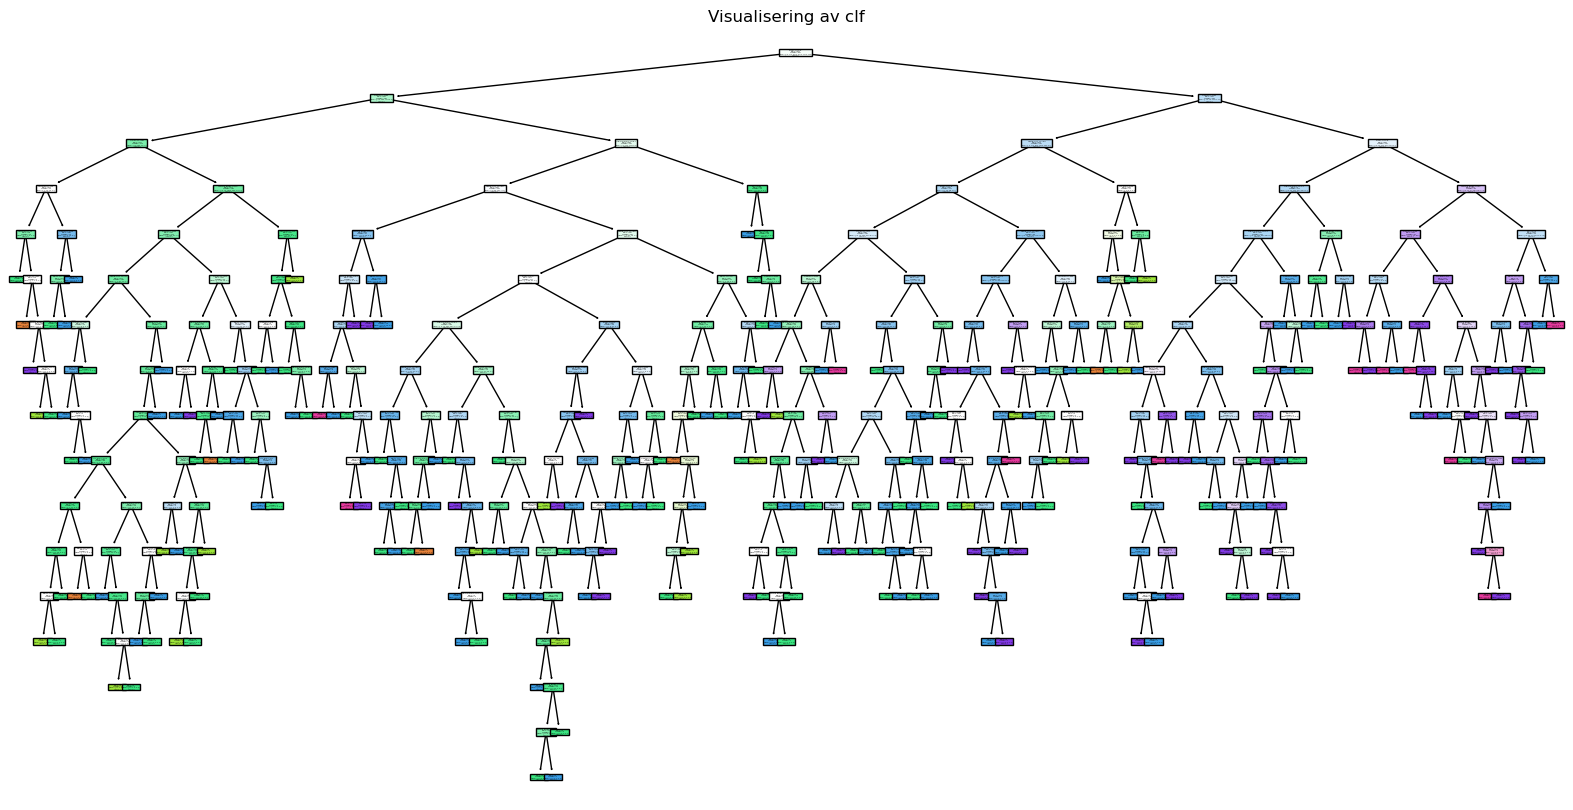

In [52]:
plt.figure(figsize=(20, 10))

plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title('Visualisering av clf')

plt.show()

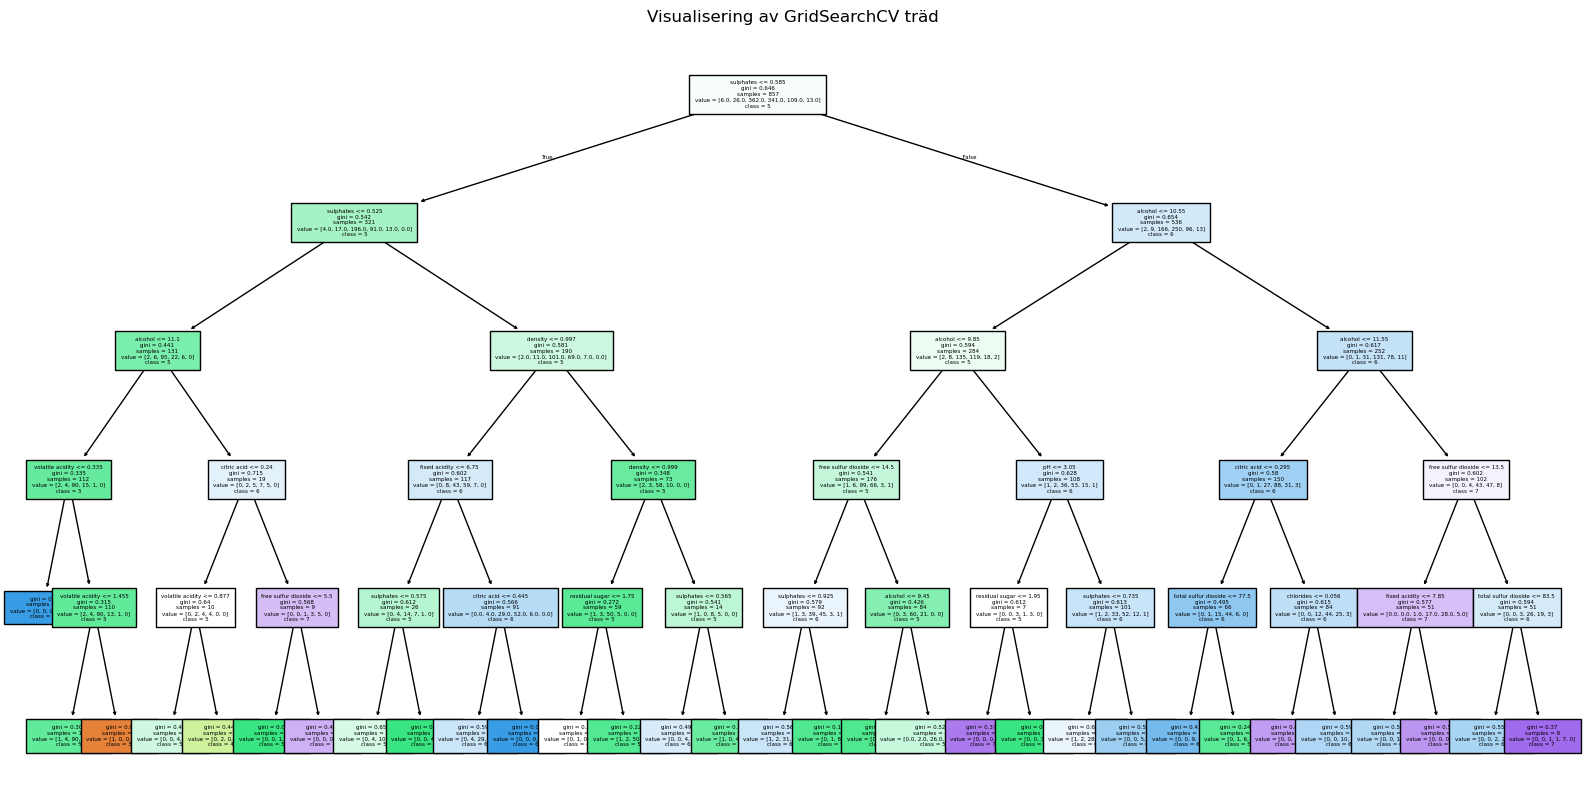

In [55]:
plt.figure(figsize=(20, 10))

plot_tree(train_score.best_estimator_, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True, fontsize=4)
plt.title('Visualisering av GridSearchCV träd')

plt.show()

## Hur många grenar kommer det maximalt från en nod?
## Varför är det max så många grenar från en nod?

En nod kan enbart ha 2 grenar, vilket grundar sig i att classification med Decision Trees använder binära beslut. Alltså 1 eller 0, True eller False på varje node. 
* T.ex "Mer än 10% alkohol: Ja/Nej" 